In [1]:
# import numpy and pandas

import numpy as np
import pandas as pd

In [77]:
# import viz libraries (matplotlib and seaborn)
# set matplotlib inline in order to see visualizations in jupyter notebook

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
# read in the csv file of 911 calls as variable 'df'

df = pd.read_csv('911.csv')

In [5]:
# check data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [82]:
#check data

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [83]:
# 5 most prevalent zipcodes for 911 calls

df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [84]:
# top 5 townships for 911 calls

df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [85]:
# count of unique title codes

df['title'].nunique()

110

In [86]:
# Create new column 'Reason', splitting 'title' column, taking first element e.g. EMS, fire, Traffic

df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [87]:
# Check new column

df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

In [88]:
# count Reason column
# EMS accounts for most 911 calls at 48,877 calls

df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

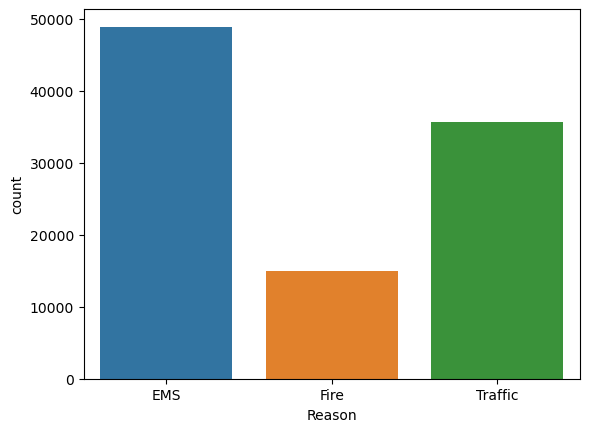

In [89]:
# visualize Reason column

sns.countplot(x='Reason',data=df)

In [90]:
# check data type of 'timeStamp' column

type(df['timeStamp'][0])

str

In [91]:
# change data type of 'timeStamp' from str to DateTime object

df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [92]:
# double check timeStamp column

type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [93]:
# Create new columns 'Hour', 'Month', 'Day of Week' from timeStamp column

time = df['timeStamp'].iloc[0]

df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [94]:
# Check that new columns are present in dataframe

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [95]:
# Change 'Day of Week' column from integers str abbreviations of days of the week

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

df['Day of Week'] = df['Day of Week'].map(dmap)

In [96]:
# Check dataframe to confirm change

df['Day of Week']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day of Week, Length: 99492, dtype: object

In [97]:
# Putting day of week into order for bar plot below

order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

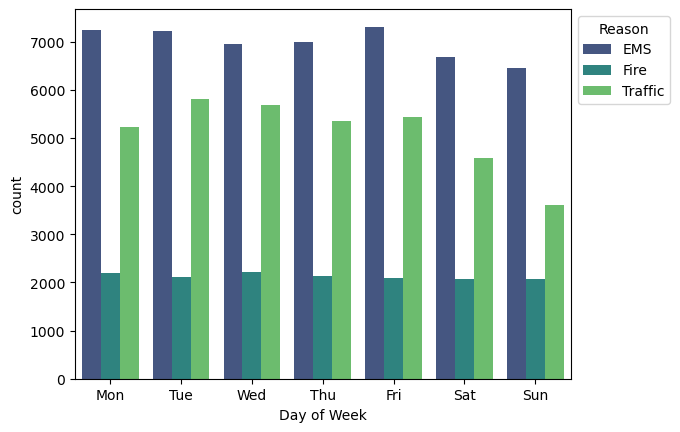

In [98]:
# Countplot of Day of Week column, hue Reason

countdow = sns.countplot(data=df,
                    x='Day of Week',
                    hue='Reason', 
                    palette='viridis',
                   order = order
                        )

sns.move_legend(countdow, 
                'upper left', 
                bbox_to_anchor=(1,1)
               )

In [99]:
byMonth = df.groupby('Month').count()

In [100]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<AxesSubplot:xlabel='Month'>

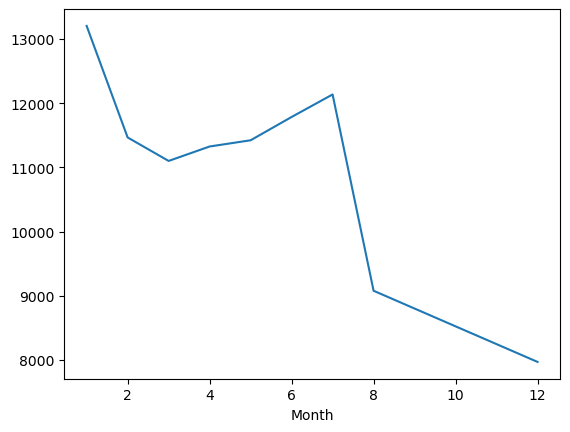

In [101]:
# Simple line graph showing the count of calls per month

byMonth['lat'].plot()

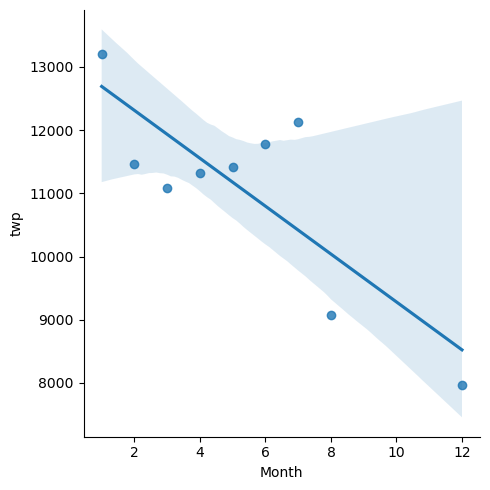

In [102]:
# Linear model of count of 911 calls grouped by month
# Seaborn shows that this model may not be a good fit
# However, model does showcase the steep drop off in calls between months 7 and 8. Might explore further to find cause.


sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

In [103]:
# Create new column called 'Date'

df['Date'] = df['timeStamp'].apply(lambda time: time.date())

In [104]:
# Double check column

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


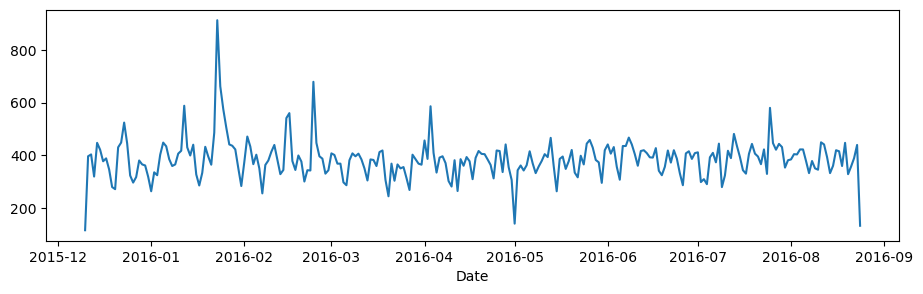

In [105]:
# Group data by Date and plot

byDate = df.groupby('Date').count()['lat'].plot(figsize=[11,3])

[Text(0.5, 1.0, '911 Calls : Traffic')]

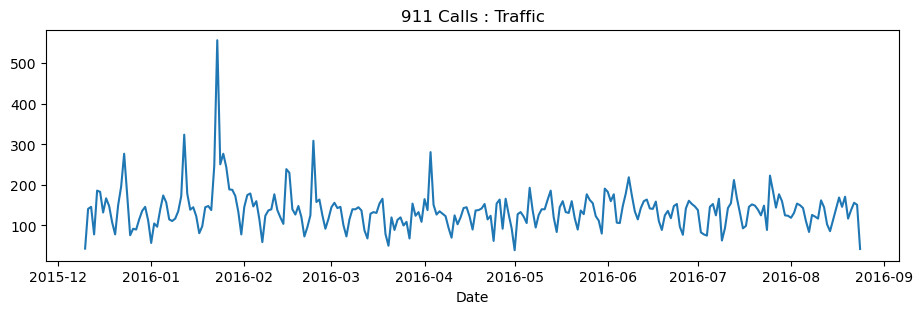

In [106]:
# 911 Calls due to Traffic Accidents

trafficplt = df[df['Reason'] == 'Traffic'].groupby('Date').count()['lat'].plot(figsize = [11,3])
trafficplt.set(title='911 Calls : Traffic')

[Text(0.5, 1.0, '911 Calls : Fire')]

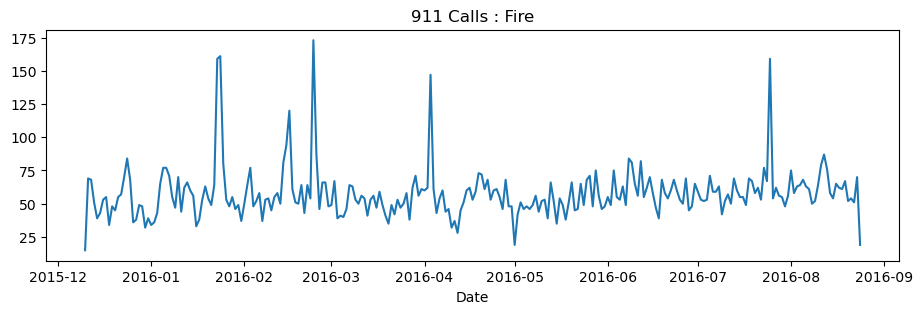

In [107]:
# 911 Calls due to Fire

trafficplt = df[df['Reason'] == 'Fire'].groupby('Date').count()['lat'].plot(figsize = [11,3])
trafficplt.set(title='911 Calls : Fire')

[Text(0.5, 1.0, '911 Calls : EMS')]

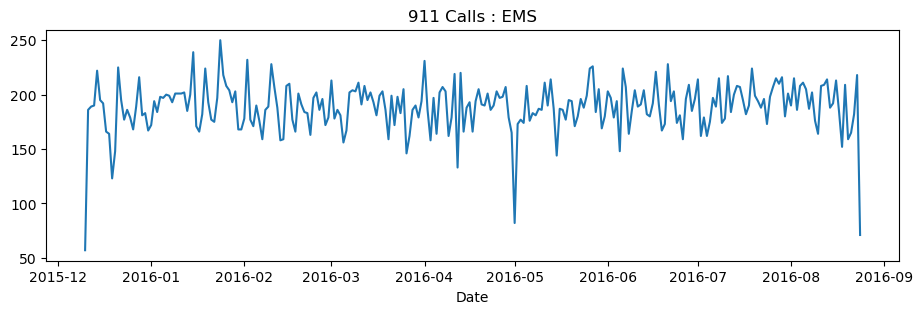

In [108]:
# 911 Calls due to EMS

trafficplt = df[df['Reason'] == 'EMS'].groupby('Date').count()['lat'].plot(figsize = [11,3])
trafficplt.set(title='911 Calls : EMS')

In [123]:
# Create unstacked data frame 'dayHour'

dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()
order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
dayHour = dayHour.reindex(index=order)

In [124]:
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

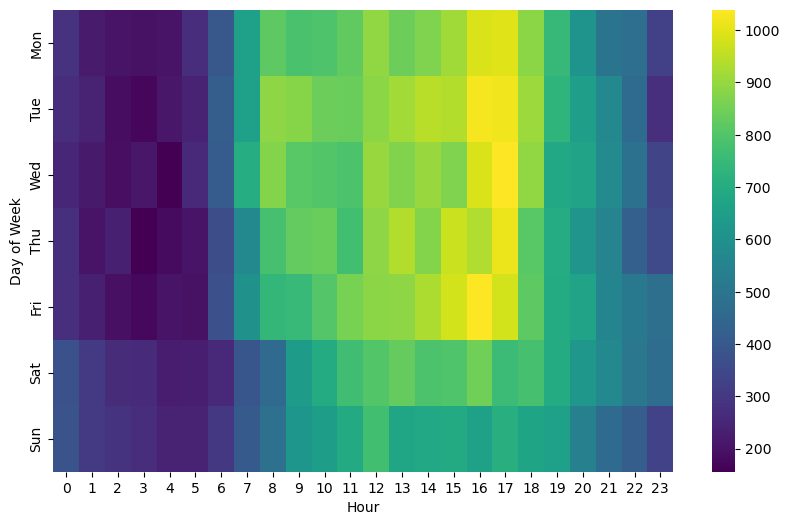

In [125]:
# Create dayHour heatmap

fig, ax = plt.subplots(figsize=(10,6))

sns.heatmap(dayHour,cmap = 'viridis')

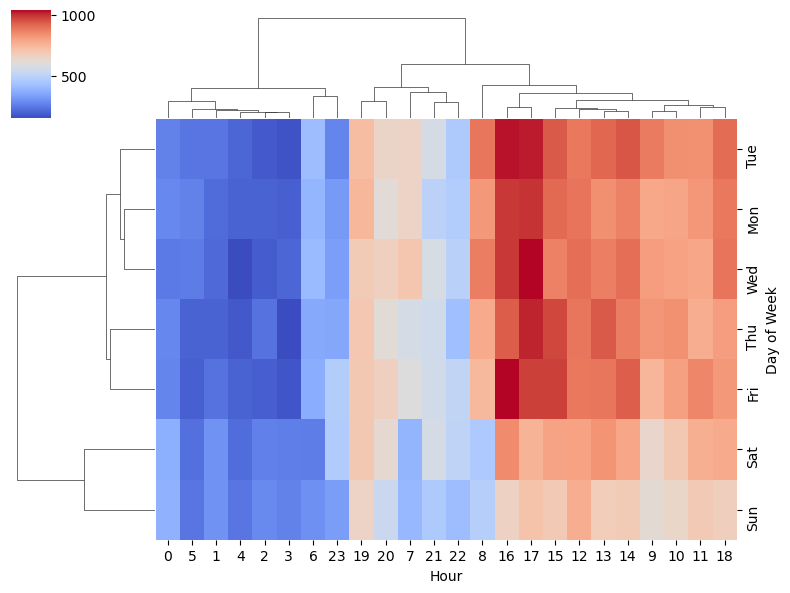

In [146]:
# dayHour Clustermap

sns.clustermap(dayHour, cmap = 'coolwarm',figsize=(8,6))

In [133]:
# Create unstacked data frame dayMonth

dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()
order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
dayMonth = dayMonth.reindex(index=order)
dayMonth

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

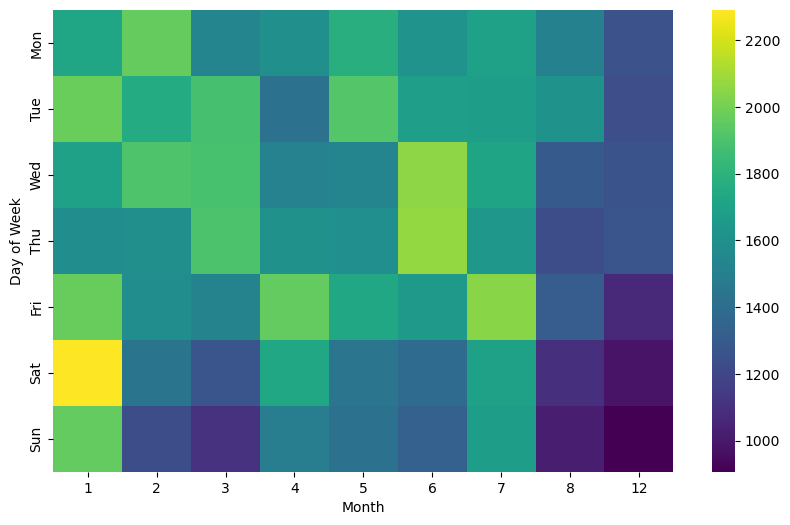

In [135]:
# Heatmap of dayMonth

fig, ax = plt.subplots(figsize=(10,6))

sns.heatmap(dayMonth, cmap='viridis')

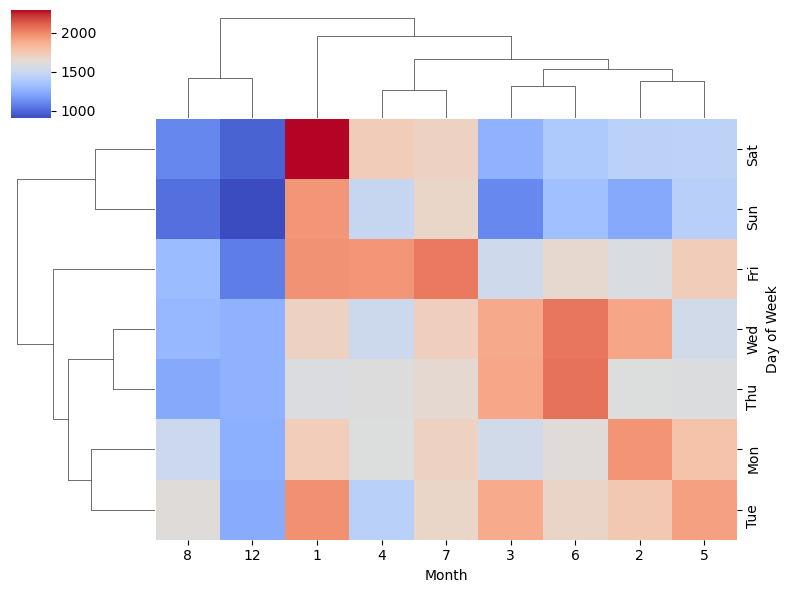

In [147]:
# Clustermap of dayMonth

sns.clustermap(dayMonth, cmap='coolwarm', figsize=(8,6))